Yoni Chanowitz, Data Science Flex 07/12/2022

Instructor: Morgan Jones

# What makes a house's price go up?

Frasier Realty want to buy a houses in the greater Seattle area, for the purpose of "flipping" them (quickly re-selling the house for a profit) and want to know what factors make a house increase in price, to get a good return on investment. 

which factor/factors of a house are the biggest determining factor towards ROI?
What should you look for in a house you wish to purchase?

i assume it's bathrooms, but that's completely subjective opinion.
let's see what the data says

In [1]:
# import pandas, ordinary least squares, statsmodels,
# OLS, stats API, formula API, scipy stats, and matplotlib
# later i will import seaborn to make graphs for my presentation

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as stat_api
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt

# inline matplots to display in the notebook
%matplotlib inline

# import the housing data and make it into a dataframe
homes = pd.read_csv('data/kc_house_data.csv')

In [2]:
# let's look at the dataframe
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Inspect the data


at least *two* of the columns have null values that need to be filled with some value, *six* are objects, which need to be made into numerical columns
lets look at what the data values could be with .head()

In [3]:
# i chose 10 rows to see more of the options
homes.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
homes['condition'].head()

0      Average
1      Average
2      Average
3    Very Good
4      Average
Name: condition, dtype: object

In [5]:
homes['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

### A few of the columns are objects. lets make them int64
or label encode them later

especially sqft_basement

In [6]:
homes['sqft_basement'].unique

<bound method Series.unique of 0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: object>

In [7]:
homes['sqft_basement'] = homes['sqft_basement'].str.replace('?', '0', regex=False).astype(np.float64)

In [8]:
homes['sqft_basement'].unique

<bound method Series.unique of 0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64>

`waterfront`, `view`, `condition`, `grade`, `yr_built`, `yr_renovated`, and `zipcode` are **categorical**. i'm not sure which ones i will use, but i think i'll use LabelEncoding to make them usable

#### zipcode is categorical
but it's too many. Morgan gave me the great idea of sepperating the zip codes by county and making binary columns

In [9]:
homes['zipcode']

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21597, dtype: int64

# Cleaning

### cleaning steps

1) drop `id` `long` and `lat`

2) turn date into an int

3) make a `sell_yr` variable, and drop `date`

4) turn `yr_renovated` into an int

5) fill nan with zeros

6) turn objects into ints

i will be dropping longitude and latitude, as the zipcode variable will be enough to show this difference. And because they are categorical (a higher number in `long` or `lat` does not mean it's better)

`date` is date sold. it would be more useful as just the year

In [10]:
homes.drop(columns=['id', 'lat', 'long'], inplace=True)

In [11]:
# convert the sell date object to a datetime object
homes['date'] = pd.to_datetime(homes['date'])
# make a new column of just the years the house was sold, as an integer 
homes['sell_yr'] = homes['date'].dt.year.astype(int)

# i'm only making a column that represents the difference in years, as the data set
# only has the years of when the house was built or renovated, and not the exact date

In [12]:
homes['sell_yr'].unique()


array([2014, 2015])

In [13]:
homes.drop(columns='date', inplace=True)

In [14]:
# fill N/A values with zeros, and convert to int, just as a precaution
homes['yr_renovated'] = homes['yr_renovated'].fillna(0).astype(int)

homes['yr_renovated']

0           0
1        1991
2           0
3           0
4           0
         ... 
21592       0
21593       0
21594       0
21595       0
21596       0
Name: yr_renovated, Length: 21597, dtype: int32

### Inspect some of the other columns
spcifically the categorial ones

some categories look ordinal. let's make them numbers (and int64 type)

Morgan gave me the idea to split Zipcodes by inside seattle and outside, and to treat it as a boolean variable

In [15]:
homes['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [16]:
seatle = [98101,98102,98103,98104,98105,98106,98107,
    98108,98109,98112,98115,98116,98117,98118,98119,
    98121,98122,98125,98126,98133,98134,98136,98144,98154,98164,98174,98195,98199]
homes['zipcode'] = homes['zipcode'].apply(lambda zip: 1 if zip in seatle else 0)
homes['zipcode'].unique()

array([0, 1], dtype=int64)

In [17]:
homes['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

a boolean value. let's get rid of NaN values and replace them with 'NO'

In [18]:
homes['waterfront'].fillna(value='NO', inplace=True)

homes['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

the next few variables ```view, condition, grade``` look ordinal. I'm going to change the text values to numbers in a scale (fair, average = 1, 2) to help for model making

In [19]:
homes['view'].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [20]:
homes['view'].fillna(value='NONE', inplace=True)

In [21]:
homes['view'].replace(to_replace=['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'], value=[1, 2, 3, 4, 5], inplace=True) 

In [22]:
homes['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [23]:
homes['condition'].replace(to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], value=[1, 2, 3, 4, 5], inplace=True) 
 
        
homes['condition'].head()

0    3
1    3
2    3
3    5
4    3
Name: condition, dtype: int64

In [24]:
homes['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [25]:
homes['grade'].replace(to_replace=['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], value=[7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13], inplace=True)

homes['grade'].head()

0    7
1    7
2    6
3    7
4    8
Name: grade, dtype: int64

condition seems like it will be most useful for our problem, as the houses we want to be dealing with will be built already. but i intend to use all three after label encoding

In [26]:
# sort dataframe by price, which is our dependent variable
homes.sort_values(by='price', inplace=True)

# Make a Simple linear regression model as a baseline

then check data for three assumptions. linearity, normality, homoscedasticity

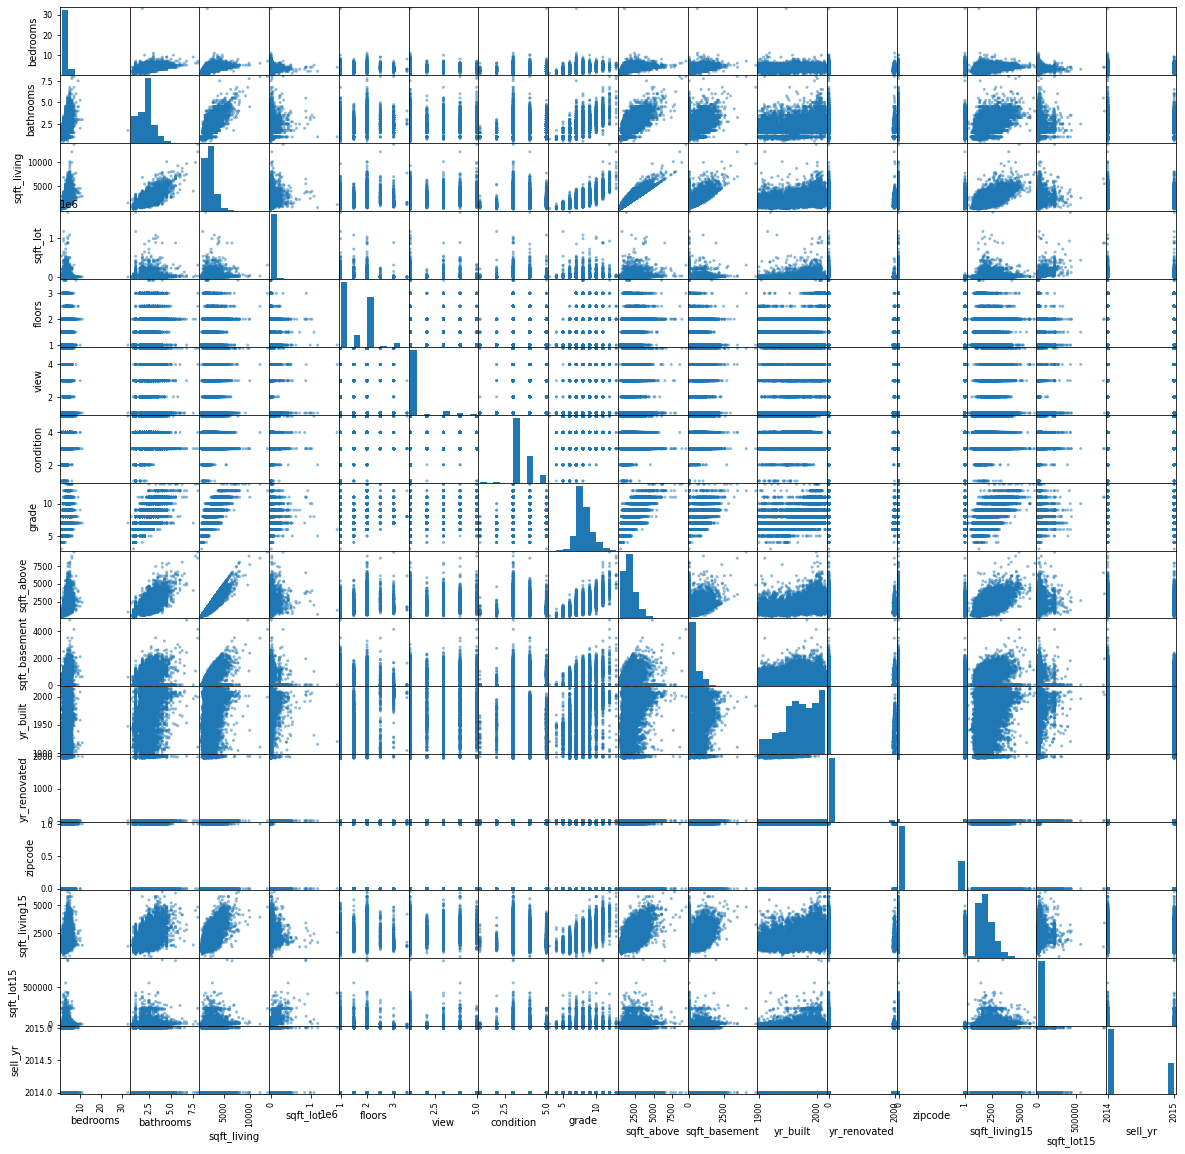

In [27]:
# let's check ALL the columns
# the_price = homes['price']
# homes.drop(columns='price', inplace=True)
data_pred = homes.iloc[:,1:24]

pd.plotting.scatter_matrix(data_pred,figsize  = [20, 20]);
plt.show()

## Make a correlation matrix (heat map)

Make a correlation matrix of the data to see which variables might have more potential correlation

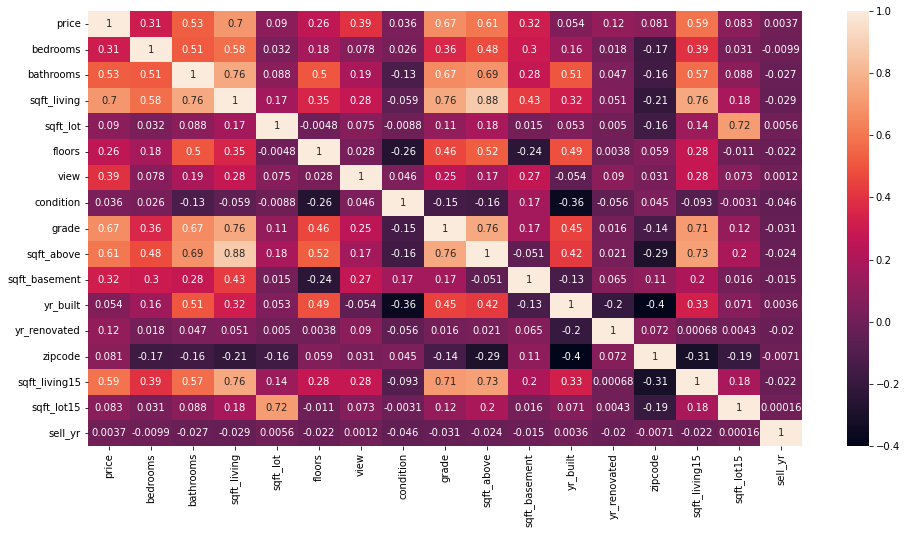

In [28]:
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.heatmap(homes.corr(), annot=True)
plt.show()

# *Square feet above* variable seems to be valuable

let's make a formula of X and Y being `sqft_above`, and `price`

In [29]:
# the formula
form = 'price~sqft_above'

#the model
pri_sqft_model = ols(formula=form, data=homes).fit()

In [30]:
# check the summery
pri_sqft_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:31:56   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.976e+04   4737.581     12.613      0.000    5.05e+04     6.9e+04
sqft_above   268.6684      2.404    111.767      0.000     263.957     273.380
==============================================================================
Omnibus:                    16492.245   Durbin-Watson:                   0.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728366.432
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      30.691   Cond. No.                     4.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### the R squared value is weak. how can we improve this model?
there is a low P value, so there is some significance, but the R squared value tells me that the model isn't good enough to account for more than 36% of the data

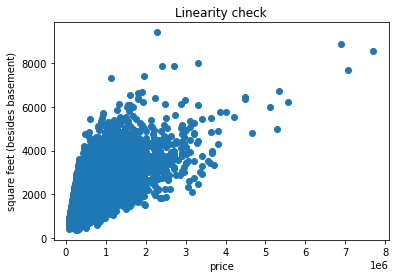

In [31]:
# scatter plot to check for linearity
plt.scatter(homes['price'], homes['sqft_above'])
plt.title("Linearity check")
plt.xlabel('price')
plt.ylabel('square feet (besides basement)')
plt.show()

## relatively linear 

check for normality and homoscedasticity

<AxesSubplot:>

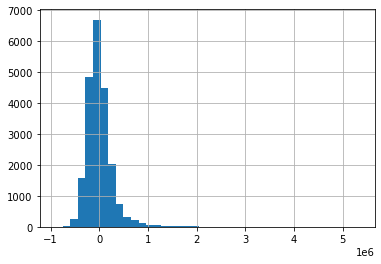

In [32]:
pri_sqft_model.resid.hist(bins=40)

***slightly*** more normal

there appears to be a few outliers, that are making our model less normal.

i ran about seven other models that i did not include in this notebook, because they were full of errors and essentially useless. what i did learn from them is:

2.5M seems like an okay cuttoff

let's cut off the outliers and make a new DataFrame to use

In [33]:
no_outliers = homes.loc[homes['price'] < 1500000]

print(len(homes) - len(no_outliers))

535


removing 102 out of 21,596 houses seems an okay amount to chop off

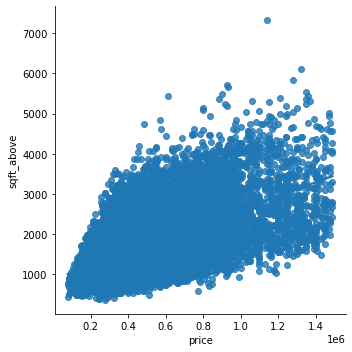

In [34]:
# let's re run the scatter plot without the outliers
sns.lmplot(x='price', y='sqft_above', data=no_outliers)

the new Data Frame appears to still be linear

### Try first model again, but without the outliers

In [35]:
form = 'price~sqft_above'

price_sqft_model = ols(formula=form, data=no_outliers).fit()

In [36]:
price_sqft_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     9545.
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:31:57   Log-Likelihood:            -2.8745e+05
No. Observations:               21062   AIC:                         5.749e+05
Df Residuals:                   21060   BIC:                         5.749e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.849e+05   3524.727     52.461      0.000    1.78e+05    1.92e+05
sqft_above   181.1215      1.854     97.699      0.000     177.488     184.755
==============================================================================
Omnibus:                     3542.213   Durbin-Watson:                   0.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6585.891
Skew:                           1.057   Prob(JB):                         0.00
Kurtosis:                       4.741   Cond. No.                     4.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### looks a bit better

let's check the DataFrame without the outliers to see if any variable has more of a correlation with price, using another heatmap

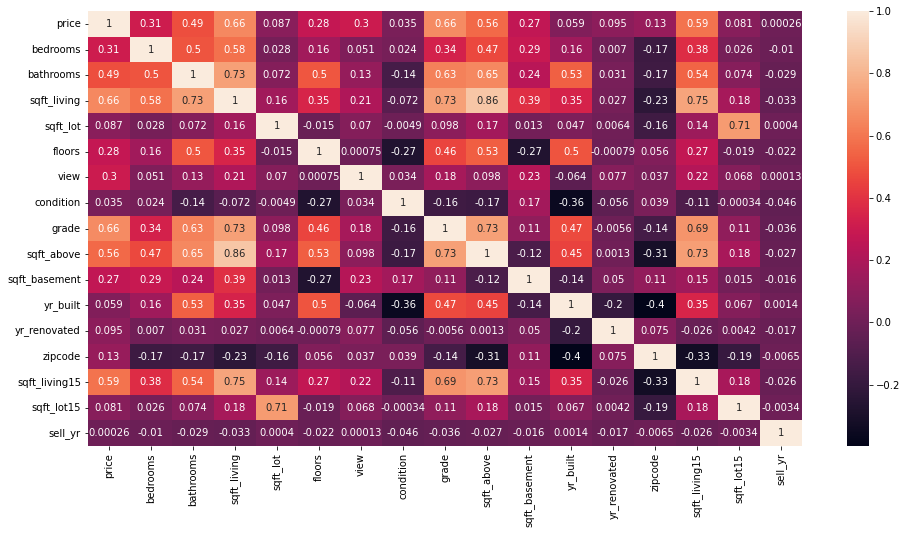

In [37]:
plt.figure(figsize=(16, 8))
sns.heatmap(no_outliers.corr(), annot=True)
plt.show()

#### Try it again with something more homoscedastic

lets try a model with `grade`

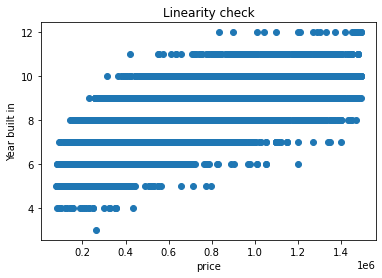

In [38]:
plt.scatter(no_outliers['price'], no_outliers['grade'])
plt.title("Linearity check")
plt.xlabel('price')
plt.ylabel('Year built in')
plt.show()

`grade` is a categorical variable, but it's ordinal

In [39]:
formula_1 = 'price~grade'

model_1 = ols(formula=formula_1, data=homes).fit()

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:31:59   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   0.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 0.46 R squared value

this model is better. maybe we can combine several correlating variables to get a better R squared value

Square feet of living space is the highest corellating factor to price, followed by square feet besides the basement, and amount of bathrooms.

the amount of bathrooms may be an effect of having more square feet. if it's an effect of multicolinearity, we will have to remove it

## Label encoding categorical variables

going to use OHE. 

In [40]:
# import labe encoder from sklearn
from sklearn.preprocessing import LabelEncoder
laibel = LabelEncoder()

# make some labels for waterfront, view and zipcode
lbl_waterfront = pd.get_dummies(no_outliers['waterfront'], prefix='wtrfrnt', drop_first=True)
lbl_view = pd.get_dummies(no_outliers['view'], prefix='view', drop_first=True)
lbl_zipcd = pd.get_dummies(no_outliers['zipcode'], prefix='zip', drop_first=True)

In [41]:
# dataframe with all the non encoded variables

homes_sin_cat = no_outliers.drop(['view', 'zipcode', 'waterfront'], axis=1)

In [42]:
# concatenate hot encoded variables with the rest of the variables

homes_labeled = pd.concat([homes_sin_cat, lbl_view, lbl_zipcd, lbl_waterfront], axis=1)

In [43]:
homes_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21062 entries, 15279 to 20807
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21062 non-null  float64
 1   bedrooms       21062 non-null  int64  
 2   bathrooms      21062 non-null  float64
 3   sqft_living    21062 non-null  int64  
 4   sqft_lot       21062 non-null  int64  
 5   floors         21062 non-null  float64
 6   condition      21062 non-null  int64  
 7   grade          21062 non-null  int64  
 8   sqft_above     21062 non-null  int64  
 9   sqft_basement  21062 non-null  float64
 10  yr_built       21062 non-null  int64  
 11  yr_renovated   21062 non-null  int32  
 12  sqft_living15  21062 non-null  int64  
 13  sqft_lot15     21062 non-null  int64  
 14  sell_yr        21062 non-null  int32  
 15  view_2         21062 non-null  uint8  
 16  view_3         21062 non-null  uint8  
 17  view_4         21062 non-null  uint8  
 18  vi

### Make new formula, and new model

i will combine all variables in the `no_outliers` dataframe, excluding whatever i dropped, and `price` which is the dependent variable (effect)

In [44]:
y_var = 'price'
x_vars = homes_labeled.drop('price', axis=1)
all_columns = '+'.join(x_vars.columns)
multi_formula_1 = y_var + '~' + all_columns

In [45]:
model_ver_1 = ols(formula=multi_formula_1, data=homes_labeled).fit()
model_ver_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     2044.
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:31:59   Log-Likelihood:            -2.8002e+05
No. Observations:               21062   AIC:                         5.601e+05
Df Residuals:                   21041   BIC:                         5.602e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.742e+07   4.28e+06     -8.734      0.000   -4.58e+07    -2.9e+07
bedrooms      -1.031e+04   1399.940     -7.362      0.000   -1.31e+04   -7562.764
bathrooms      2.414e+04   2406.423     10.032      0.000    1.94e+04    2.89e+04
sqft_living      64.1625     13.381      4.795      0.000      37.934      90.391
sqft_lot          0.1432      0.036      4.030      0.000       0.074       0.213
floors         7244.0765   2782.985      2.603      0.009    1789.212    1.27e+04
condition      2.967e+04   1695.959     17.497      0.000    2.64e+04     3.3e+04
grade          9.092e+04   1579.748     57.556      0.000    8.78e+04     9.4e+04
sqft_above       24.0728     13.377      1.800      0.072      -2.148      50.293
sqft_basement    14.5389     13.249      1.097      0.273     -11.431      40.509
yr_built      -1777.5707     54.292    -32.741      0.000   -1883.986   -1671.155
yr_renovated     20.0463      2.968      6.753      0.000      14.228      25.864
sqft_living15    79.3896      2.613     30.387      0.000      74.269      84.510
sqft_lot15       -0.1700      0.054     -3.148      0.002      -0.276      -0.064
sell_yr        1.997e+04   2126.545      9.392      0.000    1.58e+04    2.41e+04
view_2         6.333e+04   8455.144      7.490      0.000    4.68e+04    7.99e+04
view_3         4.184e+04   5066.735      8.257      0.000    3.19e+04    5.18e+04
view_4         7.635e+04   7186.545     10.624      0.000    6.23e+04    9.04e+04
view_5         1.447e+05   1.17e+04     12.342      0.000    1.22e+05    1.68e+05
zip_1          1.289e+05   2801.621     46.021      0.000    1.23e+05    1.34e+05
wtrfrnt_YES    1.898e+05   1.92e+04      9.872      0.000    1.52e+05    2.27e+05
==============================================================================
Omnibus:                     2995.185   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8008.268
Skew:                           0.787   Prob(JB):                         0.00
Kurtosis:                       5.578   Cond. No.                     2.11e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 0.676 R squared value. 

this is probably the best fit i can get, but some variables have a high P value. will have to remove those with a high P value

### *sqft_lot* has a high P value, dropping it

In [46]:
homes_labeled.drop(['sqft_lot'], axis=1, inplace=True)

In [47]:
# change pandas options, because i want to see all rows in Jupyter
# to set it back, use 'pd.set_option('display.max_rows', 10)'

pd.set_option('display.max_rows', None)

## Check for error in model

checking MAE, MSE and RMSE 

In [48]:
# get MAE to see how much error is in our model
y_predic = model_ver_1.resid
y = np.log(homes_labeled['price'])
mae_resid = np.mean(np.abs(y - y_predic))
mae_resid

107209.09452957306

$540,670 error

considering that we are dealing with millions of dollars, that seems ok

In [49]:
# and RMSE because i intend to make another model, since at least one variable has a P value that is too high
# and several coeficients are very negative 

model_ver_1.mse_resid

20690477978.059635

In [50]:
rmse_residuals = np.sqrt(model_ver_1.mse_resid)
rmse_residuals

143841.85057923733

RMSE is 209,224. less than 540,670. this makes sense as i removed a lot of the outliers,

and shows that the model is probably as linear as i can get it without sacrificing more data

In [51]:
print(rmse_residuals - mae_resid)

36632.75604966427


In [52]:
resids = model_ver_1.resid

<AxesSubplot:>

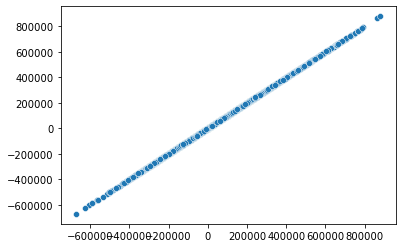

In [53]:
# check residuals for linearity

sns.scatterplot(y=y_predic,x=resids)

In [54]:
type(resids)

pandas.core.series.Series

<AxesSubplot:ylabel='Count'>

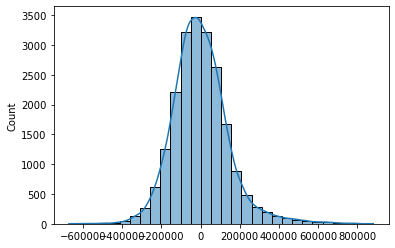

In [55]:
# and normality of residuals

sns.histplot(data=resids,bins=30, kde=True)

C:\Users\yonic\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\yonic\AppData\Local\Temp/ipykernel_18296/749231856.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


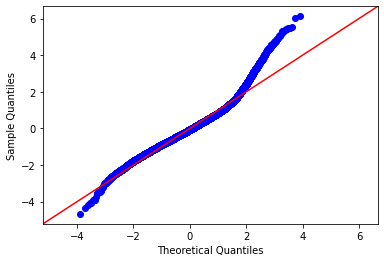

In [56]:
# a QQ plot to see if an S curve, therefore from normal distribution

from scipy import stats

fig = sm.graphics.qqplot(resids, dist=stats.norm, line='45', fit=True)
fig.show()

## Check for autocorrelation

using a method i got from Morgan

In [57]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(resids)

1.2791173986879187

some positive autocorrelation 

# Log transformations and scaling

everything looks pretty normal. not sure if log transformations are neccessary. feature scaling is though, most of the variables with high coeficients have a vastly different scale from our dedpendent variable

In [58]:
# from sklearn import preprocessing

# standard_vars = preprocessing.StandardScaler().fit_transform(homes_labeled['price'])

# homes_2 = pd.DataFrame(standard_vars, columns=homes_labeled.columns)

### Make a new model with the scaled variables

In [59]:
homes_2 = homes_labeled
homes_2['price'] = np.log(homes_labeled['price'])

x_vars = homes_2.drop('price', axis=1)
x_vars_int2 = sm.add_constant(x_vars)
model_ver_2 = sm.OLS(homes_2['price'], x_vars_int2).fit()
model_ver_2.summary()

C:\Users\yonic\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     2025.
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:32:00   Log-Likelihood:                -3282.6
No. Observations:               21062   AIC:                             6605.
Df Residuals:                   21042   BIC:                             6764.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -65.1749      8.428     -7.734      0.000     -81.693     -48.656
bedrooms         -0.0070      0.003     -2.529      0.011      -0.012      -0.002
bathrooms         0.0582      0.005     12.306      0.000       0.049       0.068
sqft_living       0.0001   2.63e-05      4.282      0.000    6.11e-05       0.000
floors            0.0234      0.005      4.267      0.000       0.013       0.034
condition         0.0659      0.003     19.752      0.000       0.059       0.072
grade             0.1679      0.003     54.027      0.000       0.162       0.174
sqft_above     2.309e-05   2.63e-05      0.878      0.380   -2.85e-05    7.47e-05
sqft_basement  2.423e-05   2.61e-05      0.930      0.352   -2.68e-05    7.53e-05
yr_built         -0.0027      0.000    -25.050      0.000      -0.003      -0.002
yr_renovated   3.663e-05   5.84e-06      6.274      0.000    2.52e-05    4.81e-05
sqft_living15     0.0002   5.13e-06     33.743      0.000       0.000       0.000
sqft_lot15     2.802e-07   7.67e-08      3.652      0.000     1.3e-07    4.31e-07
sell_yr           0.0403      0.004      9.626      0.000       0.032       0.048
view_2            0.1068      0.017      6.422      0.000       0.074       0.139
view_3            0.0552      0.010      5.536      0.000       0.036       0.075
view_4            0.0626      0.014      4.433      0.000       0.035       0.090
view_5            0.1451      0.023      6.291      0.000       0.100       0.190
zip_1             0.3049      0.006     55.368      0.000       0.294       0.316
wtrfrnt_YES       0.3774      0.038      9.981      0.000       0.303       0.452
==============================================================================
Omnibus:                       85.430   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.642
Skew:                          -0.032   Prob(JB):                     7.74e-26
Kurtosis:                       3.357   Cond. No.                     1.27e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### coeficients are scaled, a bit better R squared, and better for prediction with test-train ing



## Still good R squared
the `model_ver_2` model accounts for 67% of the data. not perfect, but good enough to progress

let's drop variables that have decreasing coeficients, and see what our R squared value is

In [60]:
predictors2 = homes_2.drop(columns=['price','bedrooms', 'floors','yr_built','sqft_lot15', 'view_3'])
predictors2 = sm.add_constant(predictors2)
model_ver_3 = sm.OLS(y, predictors2).fit()
model_ver_3.summary()

C:\Users\yonic\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     2610.
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:32:00   Log-Likelihood:                -3631.4
No. Observations:               21062   AIC:                             7293.
Df Residuals:                   21047   BIC:                             7412.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -70.4369      8.563     -8.226      0.000     -87.221     -53.652
bathrooms         0.0105      0.004      2.561      0.010       0.002       0.019
sqft_living       0.0001   2.65e-05      5.524      0.000    9.45e-05       0.000
condition         0.0932      0.003     29.243      0.000       0.087       0.099
grade             0.1486      0.003     49.385      0.000       0.143       0.154
sqft_above     9.904e-06   2.65e-05      0.373      0.709   -4.21e-05    6.19e-05
sqft_basement  1.763e-05   2.65e-05      0.666      0.506   -3.43e-05    6.95e-05
yr_renovated   7.936e-05   5.69e-06     13.940      0.000    6.82e-05    9.05e-05
sqft_living15     0.0002   5.15e-06     35.968      0.000       0.000       0.000
sell_yr           0.0403      0.004      9.481      0.000       0.032       0.049
view_2            0.1129      0.017      6.692      0.000       0.080       0.146
view_4            0.0762      0.014      5.343      0.000       0.048       0.104
view_5            0.1559      0.023      6.668      0.000       0.110       0.202
zip_1             0.3641      0.005     77.319      0.000       0.355       0.373
wtrfrnt_YES       0.4101      0.038     10.684      0.000       0.335       0.485
==============================================================================
Omnibus:                       45.748   Durbin-Watson:                   1.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.284
Skew:                           0.010   Prob(JB):                     3.64e-13
Kurtosis:                       3.255   Cond. No.                     1.74e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
model_ver_3.mse_resid

0.0827164295361895

Great P values on everything, but R squared is lower than the earlier model. All the coeficients are positive though

## Check for Multicolinearity

In [62]:
# VIF checking idea from this article:
# https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc

from statsmodels.stats.outliers_influence import variance_inflation_factor
not_categorical = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'sell_yr',]
pred_to_check = x_vars[not_categorical]
sm.add_constant(y)
vif_data = pd.DataFrame()
vif_data['Col_Names'] = not_categorical
vif_data["VIF"] = [variance_inflation_factor(pred_to_check.values, i) for i in range(len(pred_to_check.columns))]

C:\Users\yonic\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [63]:
vif_data

,Col_Names,VIF
0,bedrooms,23.691477
1,bathrooms,28.541058
2,sqft_living,864.783710
3,floors,16.938433
4,condition,34.622434
5,grade,142.300434
6,sqft_above,653.366770
7,sqft_basement,44.673101
8,yr_built,9031.699582
9,yr_renovated,1.139680


the variables `sqft_living` and `sqft_above` appear to have multicolinearity. 
`yr_built` and `sell_yr` do as well

probably because `sqft_above` includes the living room in it. i will have to remove `sqft_living`

make a new model without `sqft_living`, `yr_built` to avoid multicolinearity, and `view_3` because it has a high P value

In [71]:
predictors2_5 = homes_2.drop(columns=['sqft_living', 'yr_built', 'price', 'view_3'])
predictors2_5 = sm.add_constant(predictors2_5)
model_ver_3_5 = sm.OLS(y, predictors2_5).fit()
model_ver_3_5.summary()

C:\Users\yonic\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     2284.
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:36:42   Log-Likelihood:                -3631.9
No. Observations:               21062   AIC:                             7298.
Df Residuals:                   21045   BIC:                             7433.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -70.0019      8.565     -8.173      0.000     -86.791     -53.213
bedrooms         -0.0002      0.003     -0.088      0.930      -0.006       0.005
bathrooms         0.0198      0.004      4.399      0.000       0.011       0.029
floors           -0.0191      0.005     -3.595      0.000      -0.029      -0.009
condition         0.0924      0.003     28.605      0.000       0.086       0.099
grade             0.1507      0.003     49.190      0.000       0.145       0.157
sqft_above        0.0002   5.63e-06     27.519      0.000       0.000       0.000
sqft_basement     0.0002   6.55e-06     23.004      0.000       0.000       0.000
yr_renovated   7.865e-05    5.7e-06     13.807      0.000    6.75e-05    8.98e-05
sqft_living15     0.0002   5.18e-06     35.508      0.000       0.000       0.000
sqft_lot15     2.993e-07    7.8e-08      3.838      0.000    1.46e-07    4.52e-07
sell_yr           0.0401      0.004      9.428      0.000       0.032       0.048
view_2            0.1131      0.017      6.703      0.000       0.080       0.146
view_4            0.0750      0.014      5.248      0.000       0.047       0.103
view_5            0.1569      0.023      6.711      0.000       0.111       0.203
zip_1             0.3722      0.005     75.133      0.000       0.362       0.382
wtrfrnt_YES       0.4100      0.038     10.674      0.000       0.335       0.485
==============================================================================
Omnibus:                       45.011   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.343
Skew:                           0.006   Prob(JB):                     5.83e-13
Kurtosis:                       3.253   Cond. No.                     1.27e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

```
[3] The smallest eigenvalue is 5.34e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
```
still got multicolinearity problems

##### a 0.635 R squared value

(has a higher mean squared error though)

that's pretty good, all our P values are less than 0.01.

this looks to be a relatively reliable model to use

### 0.659 **R** squared
but no obvious multicolinearity
and no high **P** values

### Scale, fit and transform

and make test and train data sets

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc = StandardScaler()

# Make train and test data groups

to gradually validate the model

In [72]:
f_t_pred = sc.fit_transform(predictors2_5)
X_train, X_test, y_train, y_test = train_test_split(f_t_pred, y,random_state = 0,test_size=0.20)

In [82]:
# y_train

### Get R squared score of training data

In [83]:
# import metrics functions i intend to use

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

split_regr = sm.OLS(y_train, X_train).fit()
y_split_pred = split_regr.predict(X_train)
r2_score(y_true=y_train,y_pred=y_split_pred)

-746.9548258987523

### This model is okay

get y hat value, to get the Mean Squared Error of each group, to compare them

In [85]:
# Get train and test mse of model, to compare for accuracy
def split_mse(xtra, xtes, ytra, ytes):
    split_regr = sm.OLS(ytra, xtra).fit()
    y_hat_train = split_regr.predict(xtra)
    y_hat_test = split_regr.predict(xtes)

    train_mse = mean_squared_error(ytra, y_hat_train)
    test_mse = mean_squared_error(ytes, y_hat_test)
    
    print('train ',train_mse, ' test ', test_mse)
    
split_mse(X_train, X_test, y_train, y_test)

train  169.36486041682747  test  169.55510321623277


the test error is slightly more than the training error. this is good

In [87]:
f_t_pred3 = sc.fit_transform(predictors2_5)
X_train3, X_test3, y_train3, y_test3 = train_test_split(f_t_pred3, y, random_state = 0, test_size=0.20)

split_mse(X_train3, X_test3, y_train3, y_test3)

train  169.36486041682747  test  169.55510321623277


# Check for linearity and homoscedacity


## Homoscedasticity 
i hope...

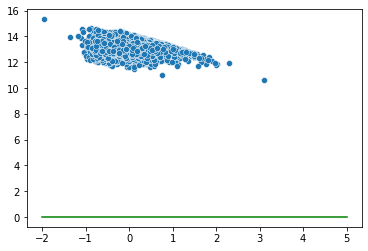

In [91]:
residuals = y_train.values - y_split_pred

mixplot = sns.scatterplot(x=y_split_pred, y=residuals)
mixplot = sns.lineplot(x=[-2,5], y=[0,0], color='green')

#### weird...
that looks like an alien space ship landing on a field of grass

but seriously, while it may have a high start point, it's generally homoscedastic

### and normality

<AxesSubplot:ylabel='Count'>

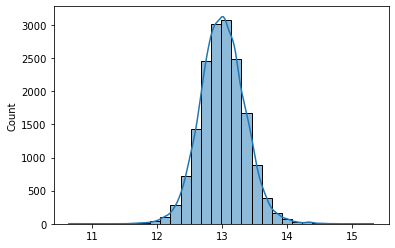

In [92]:
sns.histplot(residuals, bins=30, kde=True)

# describe what model is doing

does it answer our business question? how does it answer it?

the coeficients for `sqft_above` , `grade` , `condition` and `zip_1` being the highest, i would recomend a potential investor looking for
a house in the seatle area, not the neighboring zipcodes that has a higher square footage of the lot and living room, if possible near the water. 

for every increase in grade, a %39 increase in price
for every increase in square feet of living room, or general lot, a %20 increase each in price
if the house is on the waterfront, expect a %10 increase in price
and if the house is within the seatle area, expect a %20 increase in price
additionally, if neighboring houses have larger living rooms, you can expect a %17 increase in price

strangely, having more bathrooms consistently had correlation with a higher price. as a NYer, i am biased to think this is an important factor, but objectively, it is most probably due to larger, more expensive houses with more rooms, naturally having more bathrooms

In [93]:
grade_list = [grade_df for _, grade_df in homes.groupby('grade')]

grade_means = [np.round_(np.mean(grade['price']), decimals=0) for grade in grade_list ]

grades_df = pd.DataFrame()
grades_df['Grade_Level'] = [3,4,5,6,7,8,9,10,11, 12, 13]
grades_df['Mean_Price'] = grade_means
# homes['grade'].unique()

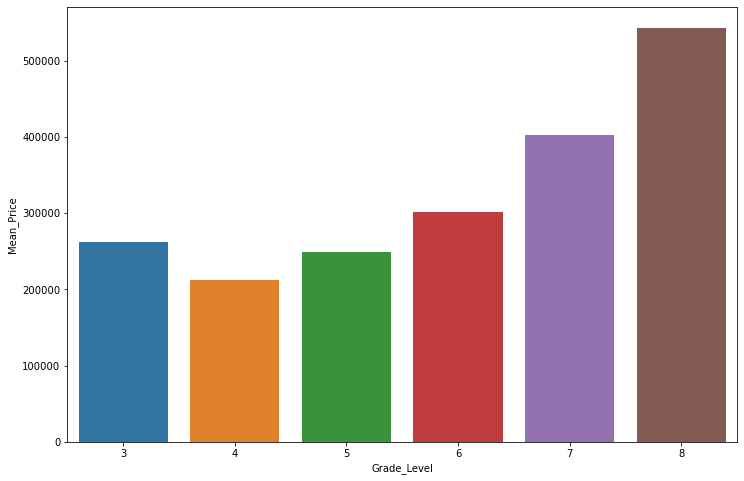

In [94]:
plt.figure(figsize=(12,8))
sns.barplot(y="Mean_Price", x="Grade_Level", data=grades_df[0:6]);

In [ ]:
cond_list = [cond_df for _, cond_df in homes.groupby('condition')]

cond_means = [np.round_(np.mean(cond['price']), decimals=0) for cond in cond_list ]

cond_df = pd.DataFrame()
cond_df['Condition_Level'] = [1, 2, 3, 4, 5]
cond_df['Mean_Price'] = cond_means
# homes['condition'].unique()

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(y="Mean_Price", x="Condition_Level", data=cond_df);

In [ ]:
grades_df['Mean_Price']

a homeowner, or investor who is buying a house in Seattle, with features in this data set, acn only really control 3 things:

1) year renovated, which affects 2) grade and 3) condition

After renovations, Fraiser can expect a \\$64 increase, per year after 1934 (\\$5632) or the year it was last made/worked on

repaint, change the roofing, plumbing, heating and wiring to be up to code, will add a minimum  \\$88,000 to the value of the house
use high quality building materials and they can expect a minimum \\$59,000 raise in value of the house

grade 5 houses, which are described as "Low construction costs and workmanship. Small, simple design." have a mean cost of \\$542,987. With improvements of one grade, the price will be raised to a mean of $773,738. With high quality materials, the mean sell price is \\$1,072,347

with the average price of houses at \\$540,296, investing \\$150k - \\$200k, total cost of house is about \\$700k, can be sold for at least \\$1m for a \\$300k profit

now that i think about it, if someone wanted to flip a house in Seattle, they should look for a warn/run down, or old house in central Seattle near the water, with as large squre footage as they can find, and invest another \\$150,000 in renovating it. they are guaranteed to make minimum \\$2,000 profit, potentially \\$300,000 profit

In [ ]:
full_house = pd.read_csv('data/kc_house_data.csv')

In [ ]:
plt.figure(figsize=(14,12))
sns.scatterplot(x=full_house['long'], y=full_house['lat'], marker="D", hue=full_house['price'], legend=None);

not really data science related, but who can actually afford a $1m house? this feels like an inflated market that is about to burst